## 2nd Project Submission


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
import os
print(os.getcwd())

C:\Users\lytoy\Downloads\Project 2


# BUSINESS QUESTION

We need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

## EXPLORE & UNDERSTAND THE DATA

In [3]:
df = pd.read_csv(r'C:\Users\lytoy\Downloads\Project 2\data\kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
unique_values = df['yr_renovated'].unique()
print(unique_values)

[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


In [5]:
unique_values = df['bedrooms'].unique()
print(unique_values)

[ 3  2  4  5  1  6  7  8  9 11 10 33]


In [6]:
unique_values = df['yr_built'].unique()
print(unique_values)

[1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934
 1938 1919 1906 1935]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### DATA CLEANING

There are null values under the variables 'waterfront', 'view', 'yr_renovated '

'view' - most of the houses haven't been viewed as most of value are 0, it doesn't help predicting the relationship. So it should be excluded to the dataset.

In [8]:
df.drop('view', axis=1, inplace=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [9]:
#Check the range of date when the house was sold
df['date'] = pd.to_datetime(df['date'])
min_date = df['date'].min()
max_date = df['date'].max()
print(min_date, max_date)

2014-05-02 00:00:00 2015-05-27 00:00:00


'date' shows all house are sold within 1 year, during which usually there is no signficant house price change. So the date is not quite related to the house price.

In [10]:
df.drop('date', axis=1, inplace=True)

In [11]:
#Fill null value under 'yr_renovated'，'waterfront'
#Check the mode of values 
mode = df['waterfront'].mode()
mode = df['yr_renovated'].mode()
mode

0    0.0
Name: yr_renovated, dtype: float64

Based on the mean and mode of 'waterfront' and 'yr_renovated' are close to 0, so we will fill the null with 0

In [12]:
#fill the nulls with 0
df['waterfront'] = df['waterfront'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [13]:
unique_values = df['yr_renovated'].unique()
print(unique_values)

[   0. 1991. 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984. 1954.
 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999. 1998.
 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971. 1979.
 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963. 1951.
 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975. 1964.
 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


In [14]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [15]:
df[df['bedrooms'] == 33]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,640000.0,33,1.75,1620,6000,1.0,0.0,5,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [16]:
# One house has 33 bedrooms and sqft_living of 1620. This is below the mean
# It is unlikely this house has 33 bedrooms, possibly a recording error

df['bedrooms'] = df['bedrooms'].replace(33, 3)
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10], dtype=int64)

The variables of 'sqft_above', 'sqft_basement' don't have great difference in terms of renovation, so they will be excluded from the dataset.

'sqft_living15', 'sqft_lot15' - data about the other houses nearby
'lat','long' - data about the location
'id' - id of a house
These variables are not related to the question - the relationship between the renovation and the hourse price, so they should not be included in the mode.

## DATA CLEANING

In [17]:
#Delete the not related variables
columns_to_drop = ['id','sqft_above', 'sqft_basement', 'lat','long', 'sqft_living15', 'sqft_lot15'] 

df = df.drop(columns=columns_to_drop)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,0.0,98178
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0,98125
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,0.0,98028
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0,98136
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0,98074
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009,0.0,98103
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014,0.0,98146
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009,0.0,98144
21595,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,2004,0.0,98027


# DATA CHECK BEFORE MODEL BUILDING

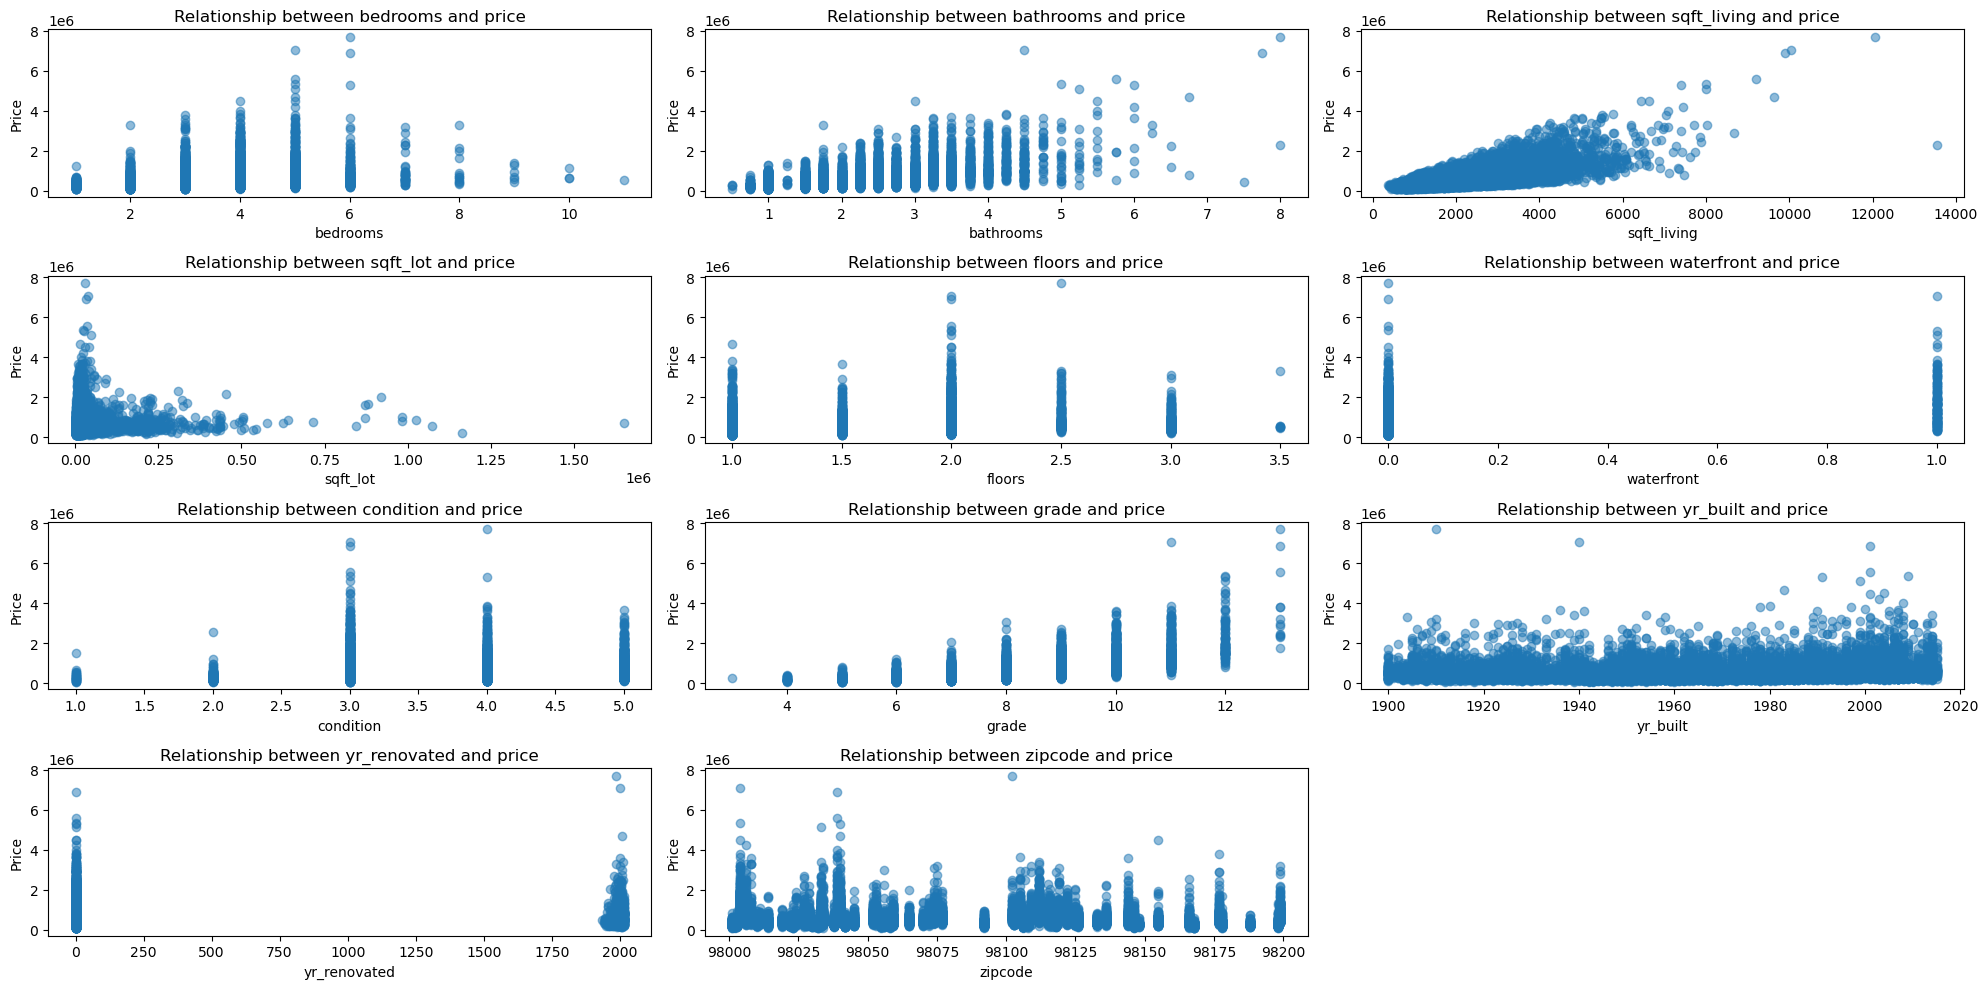

In [18]:
#Test for the linearity assumption

#Visualize the relationship between the preditors and the target using scatterplot 

columns_to_plot = [col for col in df.columns if col != 'price']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 10))  

for idx, column in enumerate(columns_to_plot):
    ax = axes[idx//3, idx%3] 
    
    ax.scatter(df[column], df['price'], alpha=0.5)
    
    ax.set_title(f'Relationship between {column} and price')
    ax.set_xlabel(column)
    ax.set_ylabel('Price')

if len(columns_to_plot) < 12:
    for idx in range(len(columns_to_plot), 12):
        axes[idx//3, idx%3].axis('off')

plt.tight_layout()
plt.show()


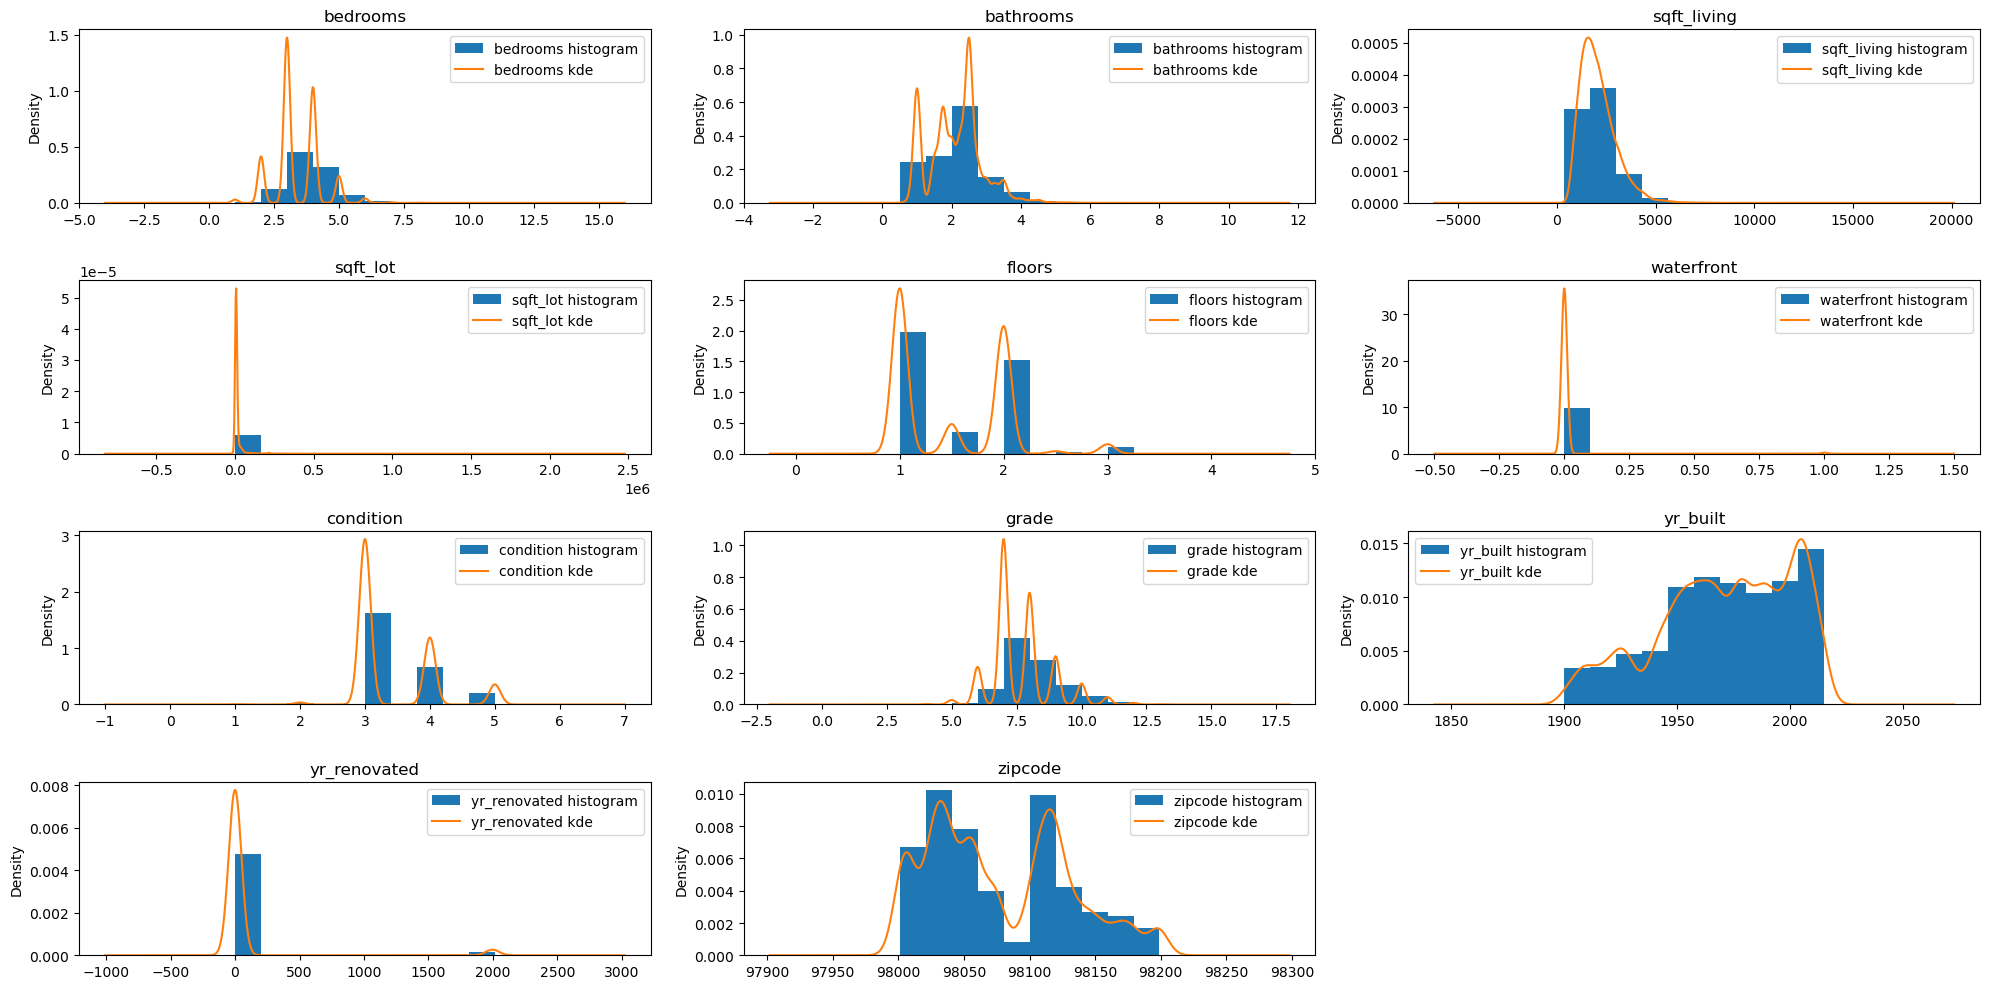

In [19]:
#Plot histograms with kde overlay to check the distribution of the predictors

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 10))  

for i, column in enumerate(columns_to_plot):
    ax = axes[i//3, i%3]
    df[column].plot.hist(density=True, label=column+' histogram', ax=ax)
    df[column].plot.kde(label=column+' kde', ax=ax)
    ax.legend()
    ax.set_title(column)

for j in range(i+1, 12):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

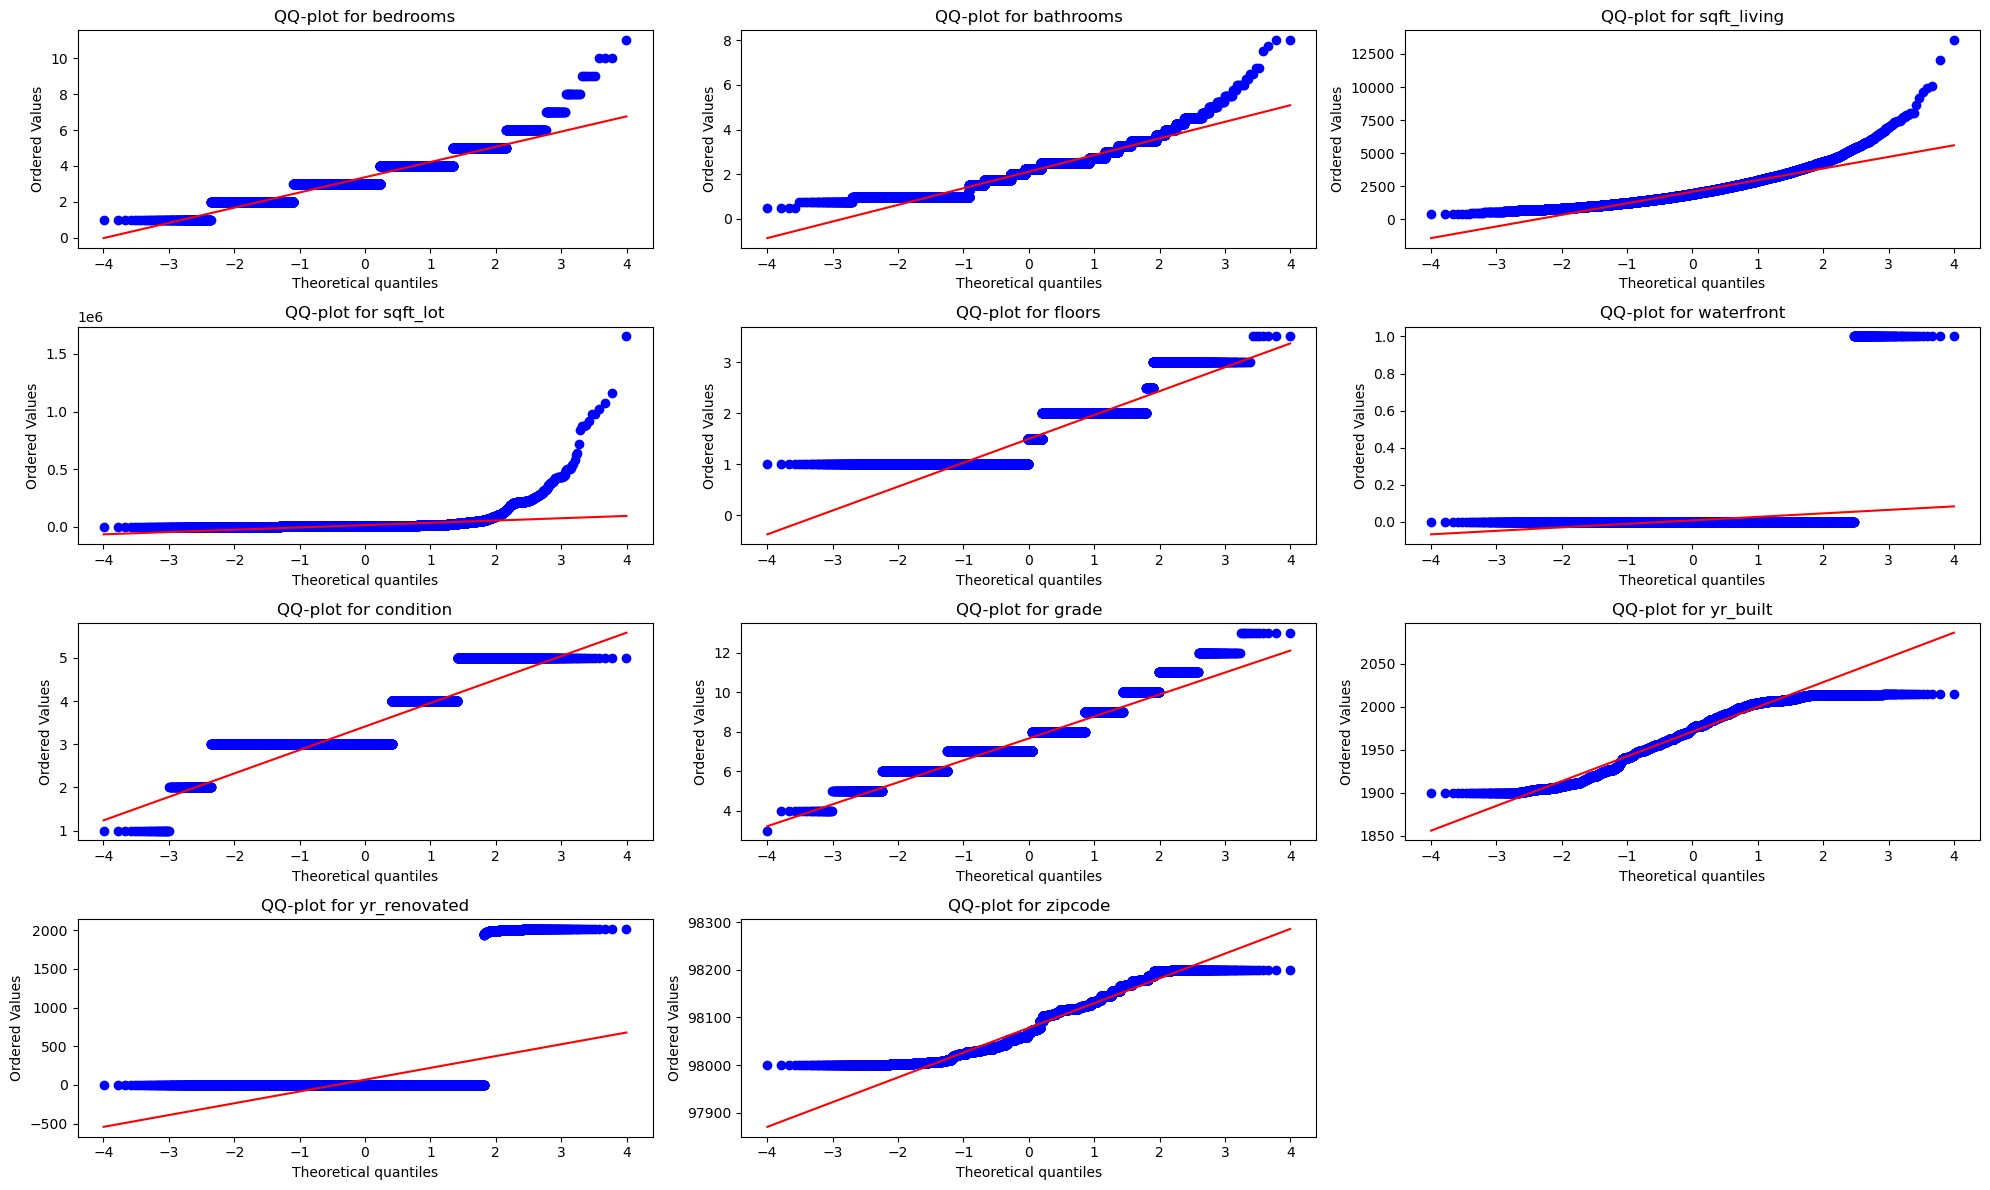

In [20]:
#Check the normality assumptions through QQ-plots

from scipy.stats import probplot

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 12))  

for idx, column in enumerate(columns_to_plot):
    ax = axes[idx // 3, idx % 3]  
    probplot(df[column], plot=ax)
    ax.set_title(f'QQ-plot for {column}')

if len(columns_to_plot) < 12:
    for idx in range(len(columns_to_plot), 12):
        axes[idx//3, idx%3].axis('off')
        
plt.tight_layout()
plt.show()

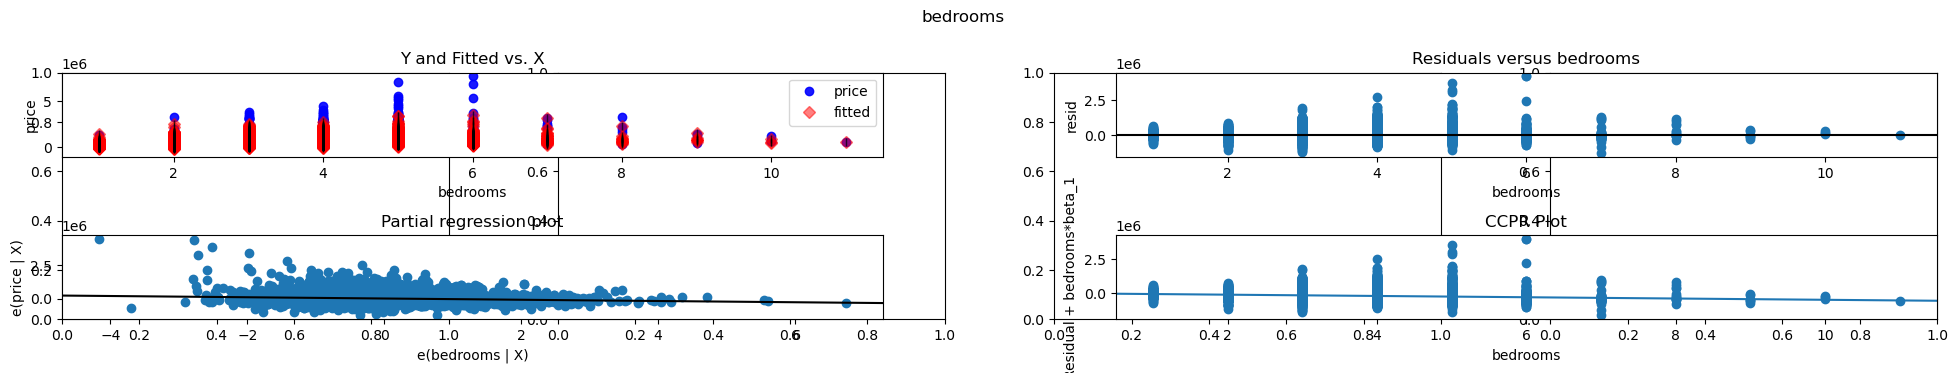

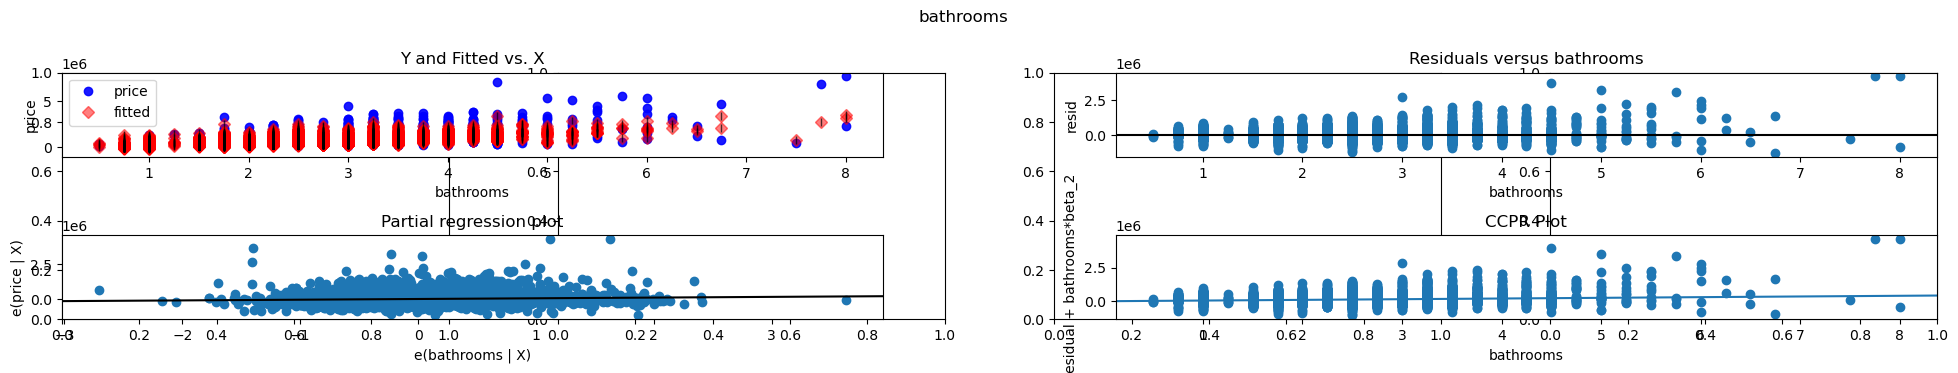

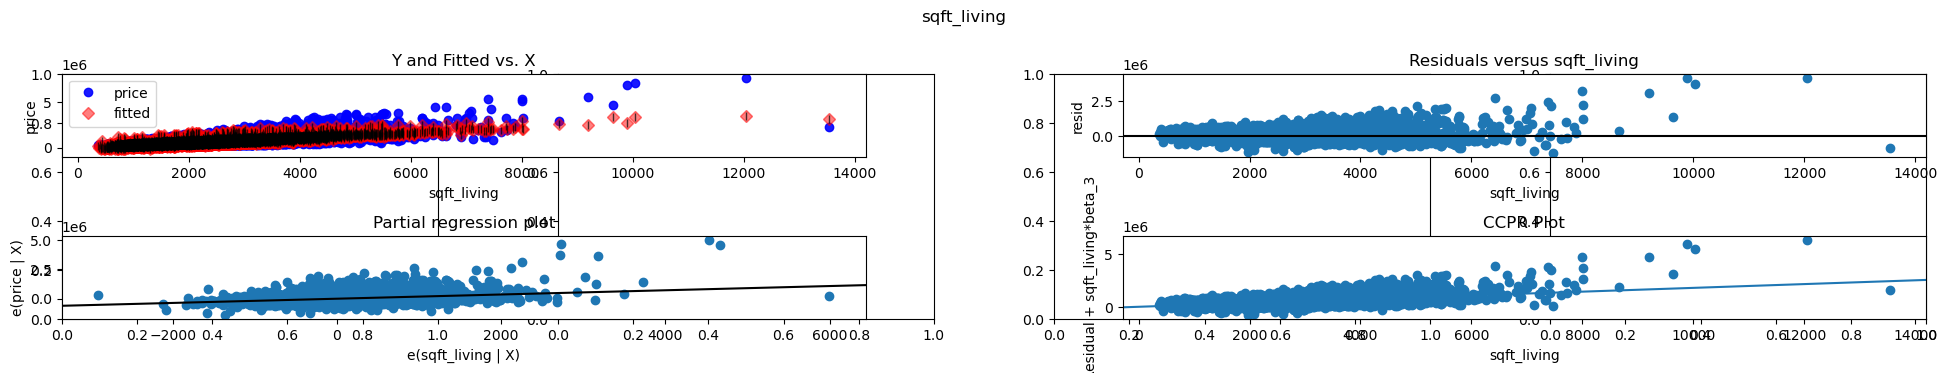

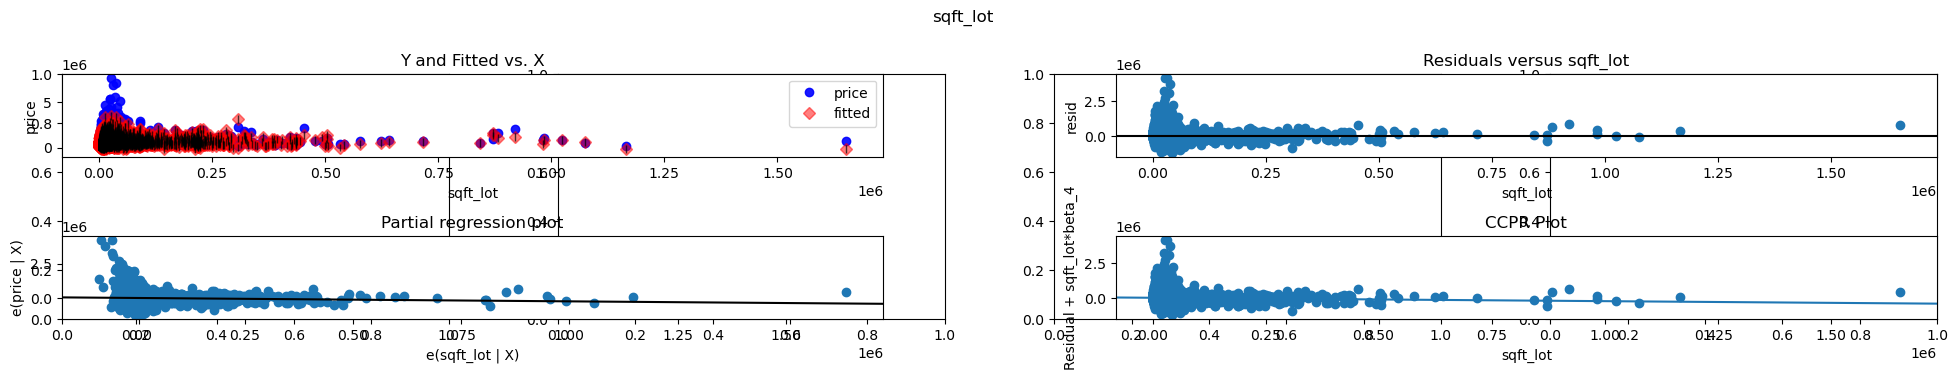

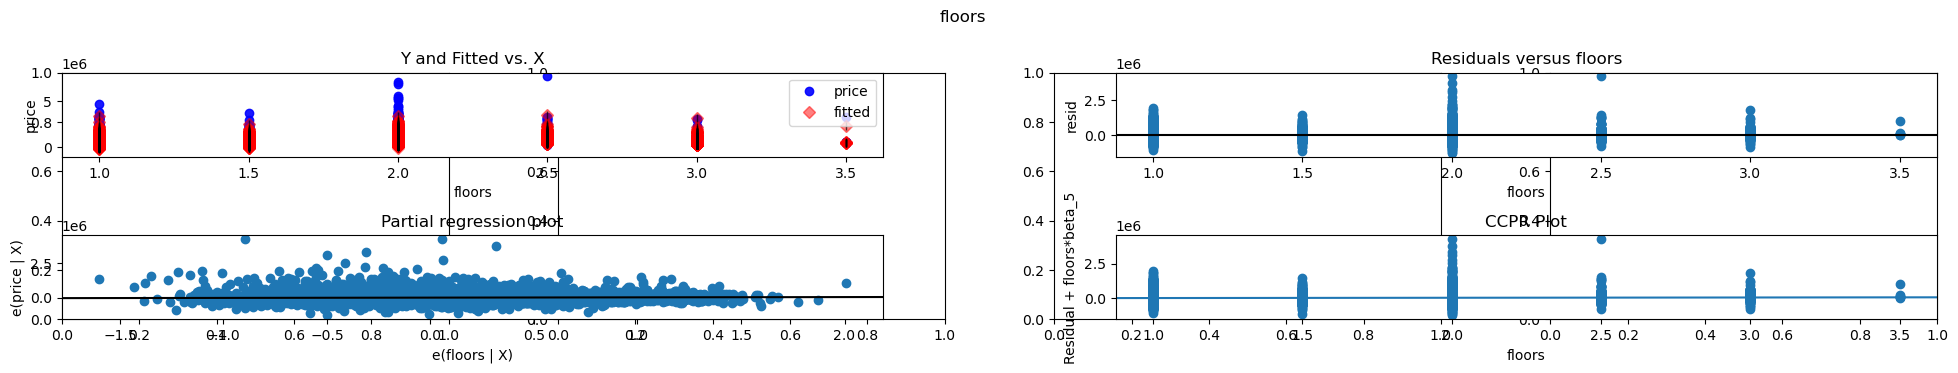

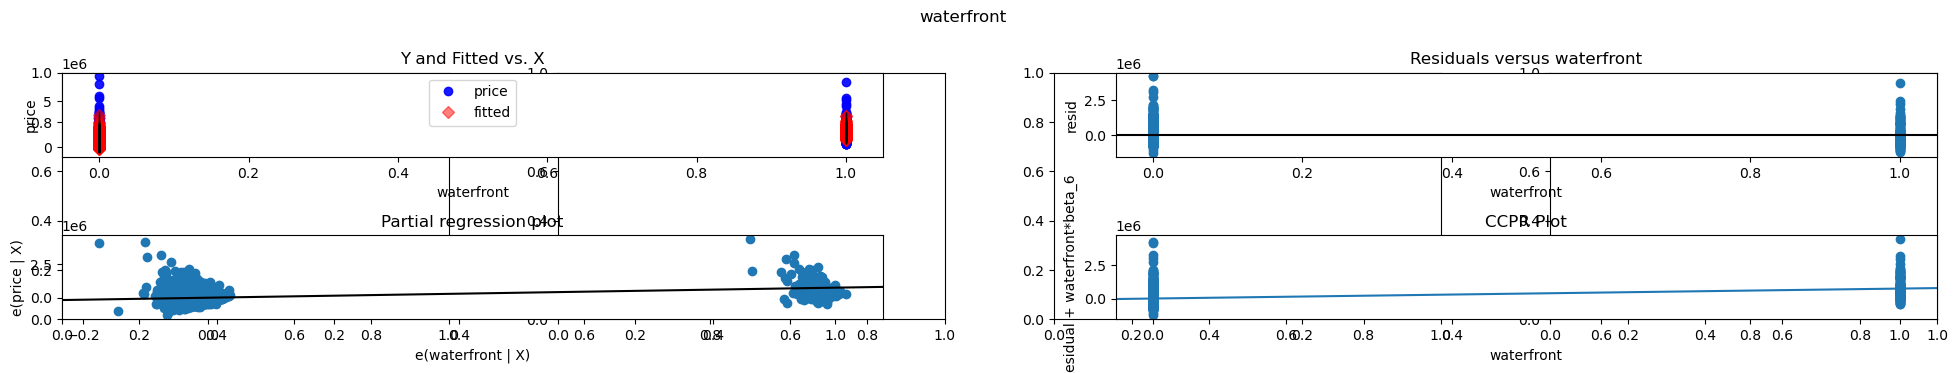

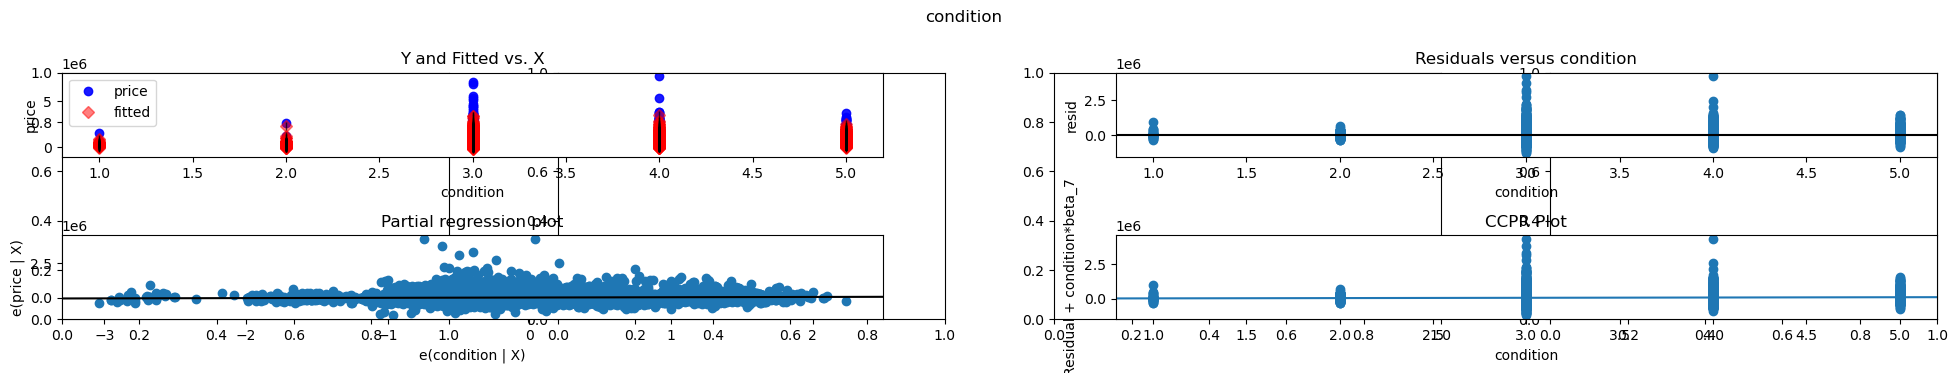

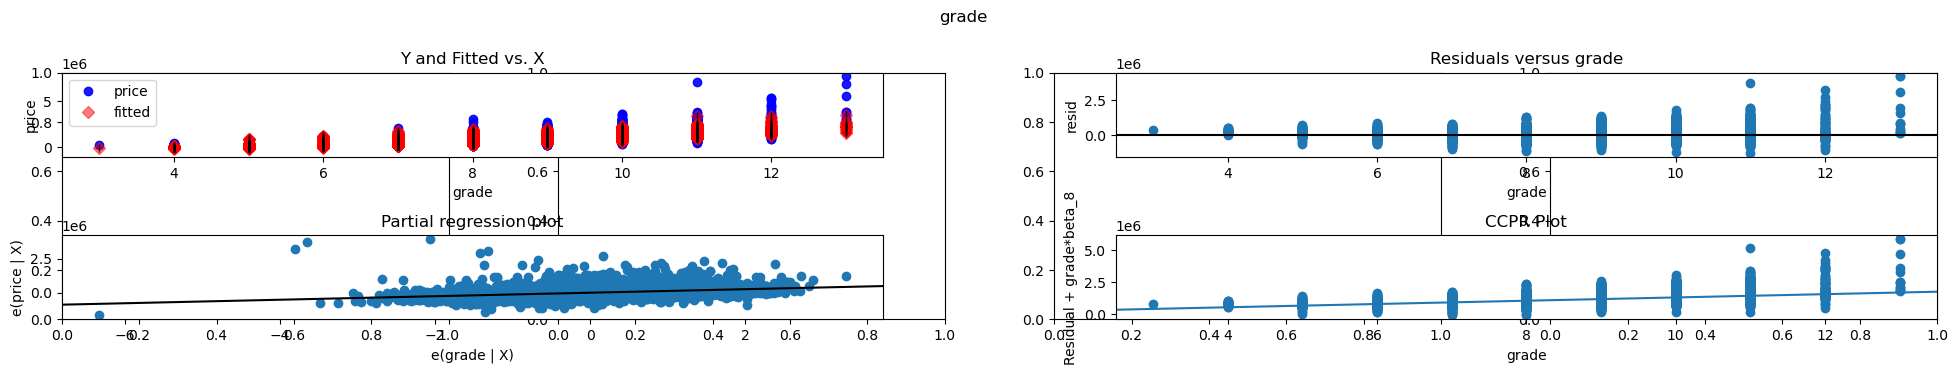

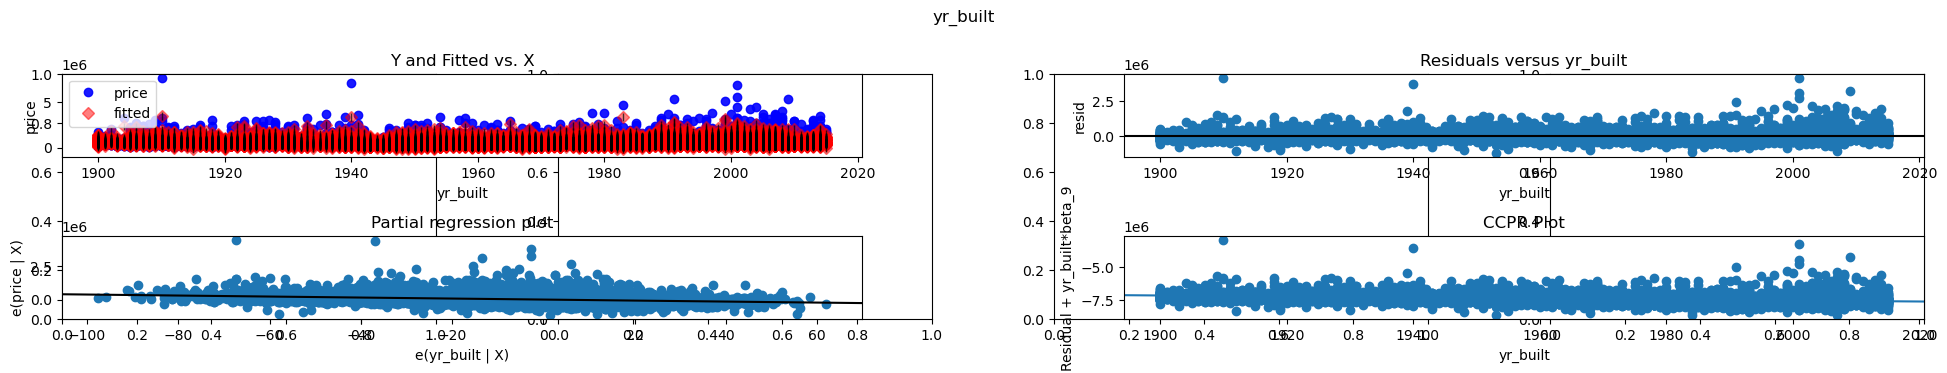

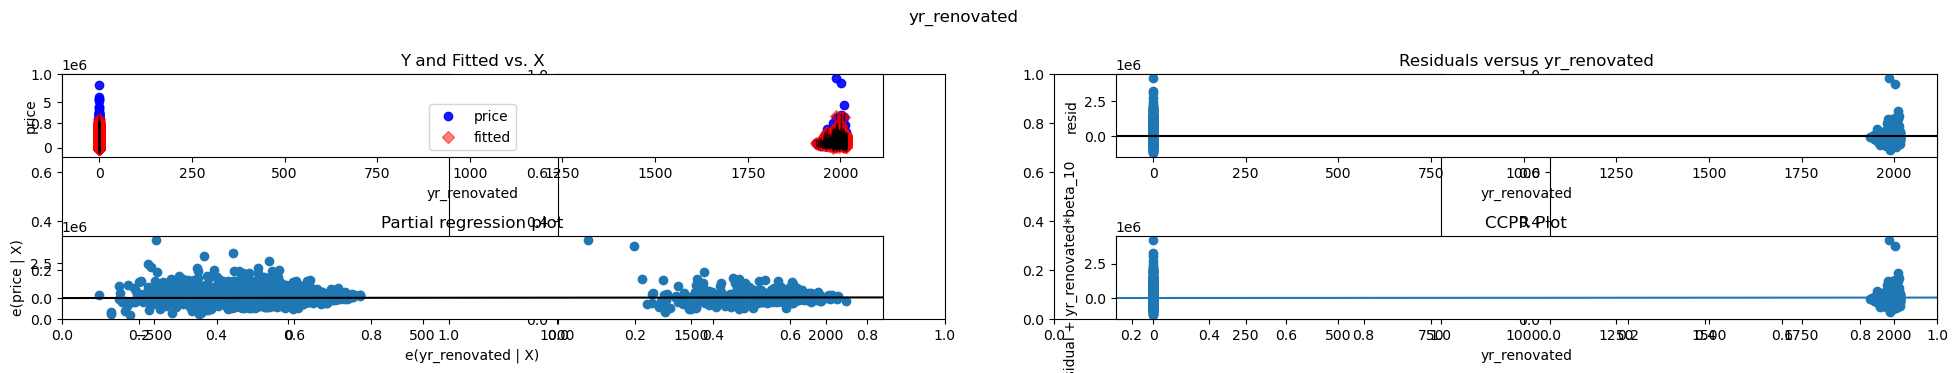

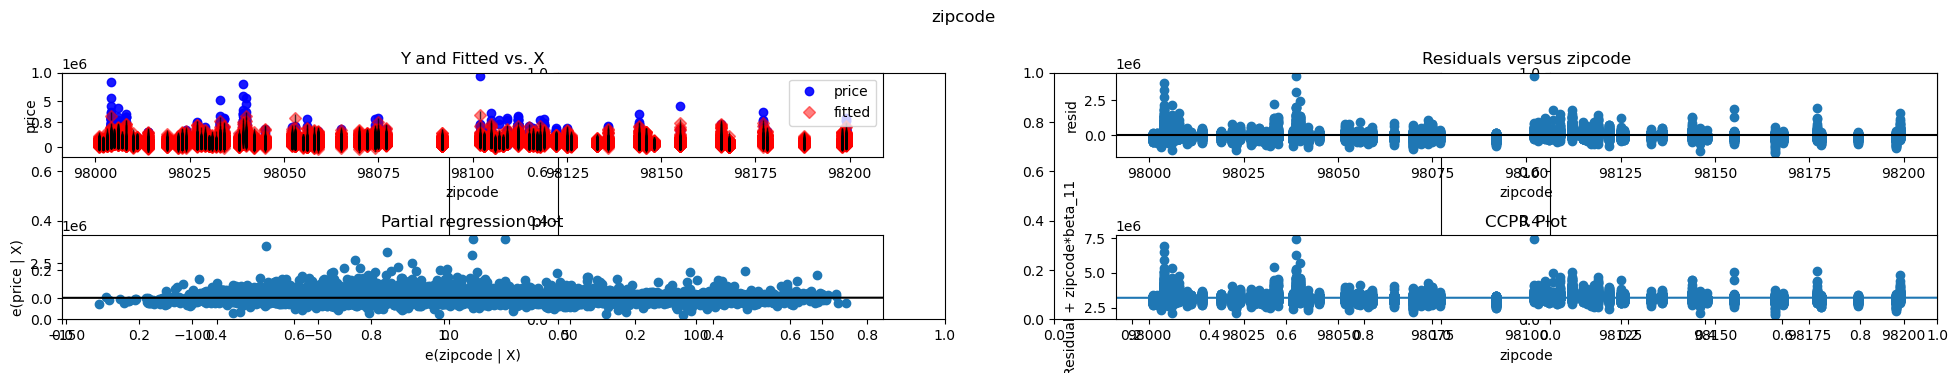

In [21]:
#Visualize the error term for variance and heteroscedasticity

import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = 'price ~ ' + ' + '.join(columns_to_plot)
model = smf.ols(formula=formula, data=df).fit()

for idx, column in enumerate(columns_to_plot):
    fig, ax = plt.subplots(1, 4, figsize=(20, 4))
    
    # Create the 4 plots for this column
    sm.graphics.plot_regress_exog(model, column, fig=fig)
    
    # Adjust the title of the figure to be the column name
    fig.suptitle(column)
    
    plt.tight_layout()
    plt.show()

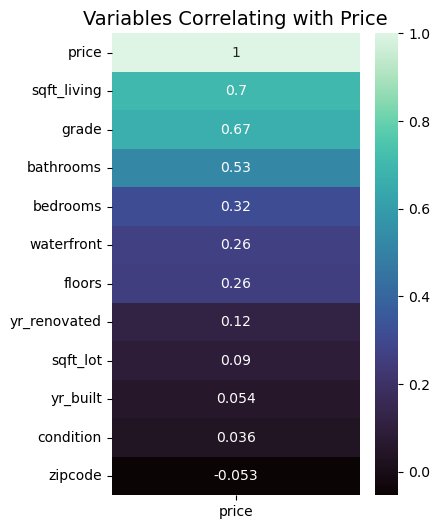

In [22]:
import seaborn as sns

price_corr = df.corr()[['price']].sort_values(by='price', ascending=False)

plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(price_corr, annot=True, cmap='mako')
heatmap.set_title('Variables Correlating with Price', fontsize=14);

Based on the correlation score, I will not use the zipcode variable in this model. It does not have a strong enough correlation with the target variable. 

It is not safe to say building age doesn't have correlation with the target variable. Will keep it for now and investigate in the following analysis.

In [23]:
df = df.drop(columns='zipcode')
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009,0.0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014,0.0
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009,0.0
21595,400000.0,3,2.50,1600,2388,2.0,0.0,3,8,2004,0.0


In [24]:
continuous = ['sqft_living', 'sqft_lot', 'price']
categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'yr_renovated']

# ITERATION 1 - Baseline Model

In [25]:
X = df.drop('price', axis=1)
y = df['price']

X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3949.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:55:31   Log-Likelihood:            -2.9616e+05
No. Observations:               21597   AIC:                         5.923e+05
Df Residuals:                   21586   BIC:                         5.924e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.581e+06   1.36e+05     48.387      0.000    6.31e+06    6.85e+06
bedrooms     -4.644e+04   2133.603    -21.768      0.000   -5.06e+04   -4.23e+04
bathrooms     5.066e+04   3482.416     14.547      0.000    4.38e+04    5.75e+04
sqft_living    179.7494      3.319     54.162      0.000     173.244     186.254
sqft_lot        -0.2493      0.037     -6.784      0.000      -0.321      -0.177
floors        2.036e+04   3458.140      5.888      0.000    1.36e+04    2.71e+04
waterfront    7.491e+05   1.84e+04     40.778      0.000    7.13e+05    7.85e+05
condition     2.018e+04   2512.483      8.032      0.000    1.53e+04    2.51e+04
grade         1.292e+05   2156.051     59.942      0.000    1.25e+05    1.33e+05
yr_built     -3783.3130     69.776    -54.221      0.000   -3920.079   -3646.547
yr_renovated    14.1151      4.304      3.279      0.001       5.678      22.552
==============================================================================
Omnibus:                    15752.580   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           990460.071
Skew:                           2.912   Prob(JB):                         0.00
Kurtosis:                      35.661   Cond. No.                     4.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# ITERATION 2

### Step 1: Reduce Multicollinearity

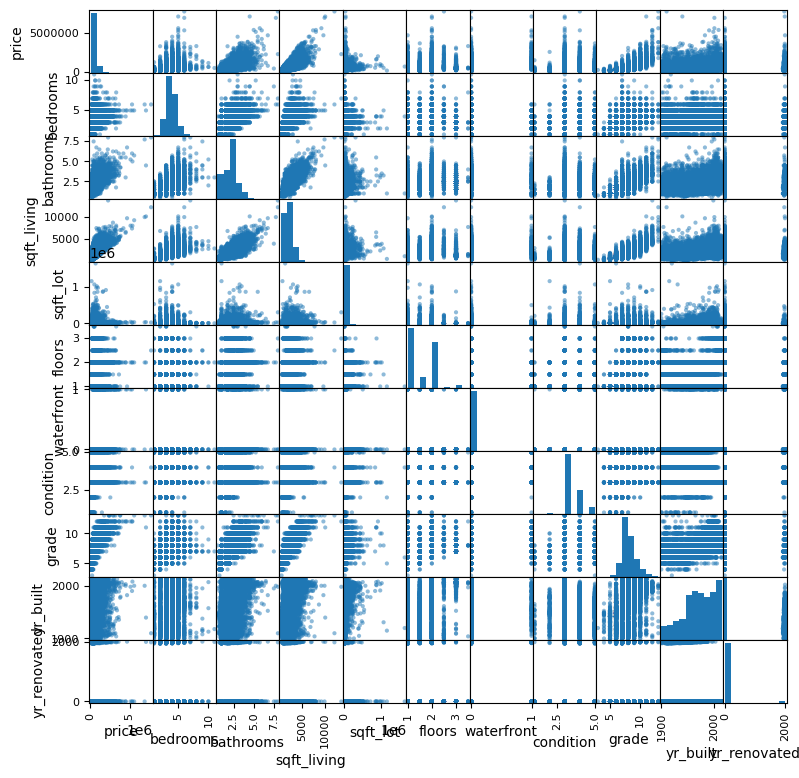

In [26]:
# Create scatter matrix for the modified dataset
pd.plotting.scatter_matrix(df, figsize=[9, 9])
plt.show()

In [27]:
df_preprocessed = df
df_preprocessed.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,1991.0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,0.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,0.0


In [28]:
df_preprocessed.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
price,1.000000,0.315954,0.525906,0.701917,0.089876,0.256804,0.264306,0.036056,0.667951,0.053953,0.117855
bedrooms,0.315954,1.000000,0.527874,0.593182,0.033606,0.183721,-0.002053,0.023390,0.366181,0.160748,0.018629
bathrooms,0.525906,0.527874,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.507173,0.047177
sqft_living,0.701917,0.593182,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.318152,0.051060
sqft_lot,0.089876,0.033606,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.052946,0.004979
floors,0.256804,0.183721,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,0.489193,0.003793
waterfront,0.264306,-0.002053,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,-0.024487,0.073939
condition,0.036056,0.023390,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,-0.361592,-0.055808
grade,0.667951,0.366181,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.447865,0.015623
yr_built,0.053953,0.160748,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.361592,0.447865,1.000000,-0.202555


In [29]:
abs(df_preprocessed.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated
price,True,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,True,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False
grade,False,False,False,True,False,False,False,False,True,False,False
yr_built,False,False,False,False,False,False,False,False,False,True,False


In [30]:
df_corr_pairs = df_preprocessed.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr_pairs['pairs'] = list(zip(df_corr_pairs.level_0, df_corr_pairs.level_1))

df_corr_pairs.set_index(['pairs'], inplace = True)

df_corr_pairs.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_corr_pairs.columns = ['cc']

df_corr_pairs.drop_duplicates(inplace=True)

df_corr_pairs[(df_corr_pairs.cc>.75) & (df_corr_pairs.cc<1)]

,cc
pairs,
"(grade, sqft_living)",0.762779
"(sqft_living, bathrooms)",0.755758


In [31]:
#Drop the variables 'grade' and 'bathrooms'
#Keep 'soft_living' as it has a strong linear relationship with price
continuous = ['sqft_lot', ' sqft_living', 'price']
categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade', 'building_age', 'reno_age']

columns_to_drop = ['grade','bathrooms']
df = df.drop(columns=columns_to_drop)
df

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated
0,221900.0,3,1180,5650,1.0,0.0,3,1955,0.0
1,538000.0,3,2570,7242,2.0,0.0,3,1951,1991.0
2,180000.0,2,770,10000,1.0,0.0,3,1933,0.0
3,604000.0,4,1960,5000,1.0,0.0,5,1965,0.0
4,510000.0,3,1680,8080,1.0,0.0,3,1987,0.0
...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,1530,1131,3.0,0.0,3,2009,0.0
21593,400000.0,4,2310,5813,2.0,0.0,3,2014,0.0
21594,402101.0,2,1020,1350,2.0,0.0,3,2009,0.0
21595,400000.0,3,1600,2388,2.0,0.0,3,2004,0.0


### Model 1 - data after multicollinearity reduced

In [32]:
#Run OLS test to see the change after reducing multicollinearity

columns_OLS = [col for col in df.columns if col != 'price']

X = df[columns_OLS]  
X = sm.add_constant(X)  
y = df['price'] 

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     3761.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:55:56   Log-Likelihood:            -2.9796e+05
No. Observations:               21597   AIC:                         5.959e+05
Df Residuals:                   21588   BIC:                         5.960e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4.924e+06   1.38e+05     35.654      0.000    4.65e+06     5.2e+06
bedrooms     -6.085e+04   2243.165    -27.126      0.000   -6.52e+04   -5.65e+04
sqft_living    323.4182      2.410    134.178      0.000     318.694     328.143
sqft_lot        -0.3318      0.040     -8.315      0.000      -0.410      -0.254
floors        7.138e+04   3587.325     19.899      0.000    6.44e+04    7.84e+04
waterfront    7.637e+05      2e+04     38.248      0.000    7.25e+05    8.03e+05
condition     2.246e+04   2723.327      8.247      0.000    1.71e+04    2.78e+04
yr_built     -2555.5438     69.739    -36.644      0.000   -2692.237   -2418.850
yr_renovated    27.6467      4.643      5.955      0.000      18.547      36.747
==============================================================================
Omnibus:                    12841.275   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           415212.489
Skew:                           2.314   Prob(JB):                         0.00
Kurtosis:                      23.976   Cond. No.                     3.77e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 2: Convert columns to category data type

The categoricial variables have many unique values respectively, which will creates a huge number of dummies and then affect the model. Instead, I separate the values under each categoricial variable into groups and create dummies for the groups.

In [33]:
# Use pd.cut() to divide 'bedrooms' into 3 bins
df['bedrooms'] = df['bedrooms'].astype(int)
df['bedrooms_bins'] = pd.cut(df['bedrooms'], bins=3, labels=['1-4', '5-7', '8-11'])

# Create dummies for 'bedrooms_bins'
dummies = pd.get_dummies(df['bedrooms_bins'], prefix='bedrooms')

# Drop the 'bedrooms' and 'bedrooms_bins' columns and concatenate the dummies
df = df.drop(columns=['bedrooms', 'bedrooms_bins'])
df = pd.concat([df, dummies], axis=1)
df

,price,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated,bedrooms_1-4,bedrooms_5-7,bedrooms_8-11
0,221900.0,1180,5650,1.0,0.0,3,1955,0.0,1,0,0
1,538000.0,2570,7242,2.0,0.0,3,1951,1991.0,1,0,0
2,180000.0,770,10000,1.0,0.0,3,1933,0.0,1,0,0
3,604000.0,1960,5000,1.0,0.0,5,1965,0.0,1,0,0
4,510000.0,1680,8080,1.0,0.0,3,1987,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,1131,3.0,0.0,3,2009,0.0,1,0,0
21593,400000.0,2310,5813,2.0,0.0,3,2014,0.0,1,0,0
21594,402101.0,1020,1350,2.0,0.0,3,2009,0.0,1,0,0
21595,400000.0,1600,2388,2.0,0.0,3,2004,0.0,1,0,0


In [34]:
bins = pd.cut(df['yr_built'], bins=3)
bin_labels = [f"yb_{int(b.left)}-{int(b.right)}" for b in bins.cat.categories]
df['yr_built_bins'] = bins.cat.rename_categories(bin_labels)
dummies = pd.get_dummies(df['yr_built_bins'], prefix='', prefix_sep='')

df = pd.concat([df, dummies], axis=1)
df.drop(columns=['yr_built', 'yr_built_bins'], inplace=True)

print(df)

          price  sqft_living  sqft_lot  floors  waterfront  condition  \
0      221900.0         1180      5650     1.0         0.0          3   
1      538000.0         2570      7242     2.0         0.0          3   
2      180000.0          770     10000     1.0         0.0          3   
3      604000.0         1960      5000     1.0         0.0          5   
4      510000.0         1680      8080     1.0         0.0          3   
...         ...          ...       ...     ...         ...        ...   
21592  360000.0         1530      1131     3.0         0.0          3   
21593  400000.0         2310      5813     2.0         0.0          3   
21594  402101.0         1020      1350     2.0         0.0          3   
21595  400000.0         1600      2388     2.0         0.0          3   
21596  325000.0         1020      1076     2.0         0.0          3   

       yr_renovated  bedrooms_1-4  bedrooms_5-7  bedrooms_8-11  yb_1899-1938  \
0               0.0             1          

In [35]:
non_zero = df[df['yr_renovated'] != 0]
bins = pd.cut(non_zero['yr_renovated'], bins=7)

bin_labels = [f"yr{int(b.left)}-{int(b.right)}" for b in bins.cat.categories]
non_zero['yr_renovated_bins'] = bins.cat.rename_categories(bin_labels)

df['yr_renovated_bins'] = df.apply(lambda row: 'yr0' if row['yr_renovated'] == 0 else non_zero['yr_renovated_bins'].get(row.name), axis=1)
dummies = pd.get_dummies(df['yr_renovated_bins'], prefix='', prefix_sep='')

df = pd.concat([df, dummies], axis=1)
df.drop(columns=['yr_renovated', 'yr_renovated_bins'], inplace=True)

df

C:\Users\lytoy\AppData\Local\Temp\ipykernel_24968\3469213260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_zero['yr_renovated_bins'] = bins.cat.rename_categories(bin_labels)


,price,sqft_living,sqft_lot,floors,waterfront,condition,bedrooms_1-4,bedrooms_5-7,bedrooms_8-11,yb_1899-1938,yb_1938-1976,yb_1976-2015,yr0,yr1933-1945,yr1945-1957,yr1957-1968,yr1968-1980,yr1980-1991,yr1991-2003,yr2003-2015
0,221900.0,1180,5650,1.0,0.0,3,1,0,0,0,1,0,1,0,0,0,0,0,0,0
1,538000.0,2570,7242,2.0,0.0,3,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,180000.0,770,10000,1.0,0.0,3,1,0,0,1,0,0,1,0,0,0,0,0,0,0
3,604000.0,1960,5000,1.0,0.0,5,1,0,0,0,1,0,1,0,0,0,0,0,0,0
4,510000.0,1680,8080,1.0,0.0,3,1,0,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,1131,3.0,0.0,3,1,0,0,0,0,1,1,0,0,0,0,0,0,0
21593,400000.0,2310,5813,2.0,0.0,3,1,0,0,0,0,1,1,0,0,0,0,0,0,0
21594,402101.0,1020,1350,2.0,0.0,3,1,0,0,0,0,1,1,0,0,0,0,0,0,0
21595,400000.0,1600,2388,2.0,0.0,3,1,0,0,0,0,1,1,0,0,0,0,0,0,0


### Model 2 - data with catergoricial variables transformed

In [36]:
columns_OLS = [col for col in df.columns if col != 'price']

X = df[columns_OLS]  
X = sm.add_constant(X)  
y = df['price'] 

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     1793.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:55:57   Log-Likelihood:            -2.9826e+05
No. Observations:               21597   AIC:                         5.966e+05
Df Residuals:                   21580   BIC:                         5.967e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.475e+05   1.46e+04    -10.088      0.000   -1.76e+05   -1.19e+05
sqft_living     290.8877      2.151    135.259      0.000     286.672     295.103
sqft_lot         -0.2245      0.040     -5.557      0.000      -0.304      -0.145
floors         5.616e+04   3924.395     14.310      0.000    4.85e+04    6.39e+04
waterfront     8.183e+05   2.03e+04     40.401      0.000    7.79e+05    8.58e+05
condition      2.246e+04   2754.467      8.153      0.000    1.71e+04    2.79e+04
bedrooms_1-4   1.067e+04   1.43e+04      0.748      0.454   -1.73e+04    3.86e+04
bedrooms_5-7  -4.936e+04   1.47e+04     -3.356      0.001   -7.82e+04   -2.05e+04
bedrooms_8-11 -1.088e+05   3.69e+04     -2.945      0.003   -1.81e+05   -3.64e+04
yb_1899-1938   5.841e+04   5778.082     10.109      0.000    4.71e+04    6.97e+04
yb_1938-1976  -5.965e+04   5443.673    -10.958      0.000   -7.03e+04    -4.9e+04
yb_1976-2015  -1.462e+05   5961.948    -24.528      0.000   -1.58e+05   -1.35e+05
yr0           -2775.7479   1.52e+04     -0.183      0.855   -3.25e+04    2.69e+04
yr1933-1945   -8.849e+04   8.11e+04     -1.091      0.275   -2.48e+05    7.06e+04
yr1945-1957   -8.115e+04   5.84e+04     -1.390      0.164   -1.96e+05    3.32e+04
yr1957-1968    -1.46e+05   4.07e+04     -3.585      0.000   -2.26e+05   -6.62e+04
yr1968-1980    -5.38e+04   3.24e+04     -1.662      0.096   -1.17e+05    9629.326
yr1980-1991   -1.292e+04   2.27e+04     -0.569      0.569   -5.74e+04    3.16e+04
yr1991-2003    1.264e+05   2.12e+04      5.952      0.000    8.47e+04    1.68e+05
yr2003-2015    1.113e+05   1.95e+04      5.721      0.000    7.32e+04    1.49e+05
==============================================================================
Omnibus:                    13537.559   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           492273.587
Skew:                           2.464   Prob(JB):                         0.00
Kurtosis:                      25.864   Cond. No.                     1.50e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.86e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Step 3: Log transformation and normalization

In [37]:
import numpy as np

continuous = ['sqft_living', 'sqft_lot','price']

# Log transform
df_log = np.log(df[continuous])
df_log.columns = [f'{column}_log' for column in df_log.columns]

df = df.drop(columns=continuous)
df = pd.concat([df, df_log], axis=1)
df

,floors,waterfront,condition,bedrooms_1-4,bedrooms_5-7,bedrooms_8-11,yb_1899-1938,yb_1938-1976,yb_1976-2015,yr0,yr1933-1945,yr1945-1957,yr1957-1968,yr1968-1980,yr1980-1991,yr1991-2003,yr2003-2015,sqft_living_log,sqft_lot_log,price_log
0,1.0,0.0,3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,7.073270,8.639411,12.309982
1,2.0,0.0,3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,7.851661,8.887653,13.195614
2,1.0,0.0,3,1,0,0,1,0,0,1,0,0,0,0,0,0,0,6.646391,9.210340,12.100712
3,1.0,0.0,5,1,0,0,0,1,0,1,0,0,0,0,0,0,0,7.580700,8.517193,13.311329
4,1.0,0.0,3,1,0,0,0,0,1,1,0,0,0,0,0,0,0,7.426549,8.997147,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3.0,0.0,3,1,0,0,0,0,1,1,0,0,0,0,0,0,0,7.333023,7.030857,12.793859
21593,2.0,0.0,3,1,0,0,0,0,1,1,0,0,0,0,0,0,0,7.745003,8.667852,12.899220
21594,2.0,0.0,3,1,0,0,0,0,1,1,0,0,0,0,0,0,0,6.927558,7.207860,12.904459
21595,2.0,0.0,3,1,0,0,0,0,1,1,0,0,0,0,0,0,0,7.377759,7.778211,12.899220


### Model 3 - data after log transformed

In [38]:
#Select the independent variables for preparation for the X in OLS test 

columns_OLS = [col for col in df.columns if col != 'price_log']

X = df[columns_OLS]  
X = sm.add_constant(X)  
y = df['price_log'] 

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     1483.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:55:57   Log-Likelihood:                -8784.0
No. Observations:               21597   AIC:                         1.760e+04
Df Residuals:                   21580   BIC:                         1.774e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.5540      0.036     98.174      0.000       3.483       3.625
floors              0.1120      0.006     17.714      0.000       0.100       0.124
waterfront          0.7177      0.031     23.505      0.000       0.658       0.778
condition           0.0405      0.004      9.702      0.000       0.032       0.049
bedrooms_1-4        1.2456      0.023     55.058      0.000       1.201       1.290
bedrooms_5-7        1.1966      0.024     49.102      0.000       1.149       1.244
bedrooms_8-11       1.1118      0.057     19.555      0.000       1.000       1.223
yb_1899-1938        1.3616      0.012    111.131      0.000       1.338       1.386
yb_1938-1976        1.1472      0.012     91.856      0.000       1.123       1.172
yb_1976-2015        1.0452      0.014     74.993      0.000       1.018       1.073
yr0                 0.4745      0.023     20.580      0.000       0.429       0.520
yr1933-1945         0.3765      0.123      3.072      0.002       0.136       0.617
yr1945-1957         0.3404      0.088      3.860      0.000       0.168       0.513
yr1957-1968         0.2224      0.062      3.611      0.000       0.102       0.343
yr1968-1980         0.4113      0.049      8.395      0.000       0.315       0.507
yr1980-1991         0.4606      0.035     13.348      0.000       0.393       0.528
yr1991-2003         0.6255      0.032     19.325      0.000       0.562       0.689
yr2003-2015         0.6428      0.030     21.654      0.000       0.585       0.701
sqft_living_log     0.8763      0.008    114.909      0.000       0.861       0.891
sqft_lot_log       -0.0311      0.003     -9.659      0.000      -0.037      -0.025
==============================================================================
Omnibus:                        4.860   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.855
Skew:                           0.037   Prob(JB):                       0.0882
Kurtosis:                       3.002   Cond. No.                     3.69e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.47e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [39]:
# Normalize

continuous = ['sqft_living_log', 'sqft_lot_log', 'price_log']

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_norm = df[continuous].apply(normalize)

# Drop the original continuous columns from df_log and concatenate the normalized dataframe
df_log_norm = df.drop(columns=continuous)
df_log_norm = pd.concat([df_log_norm, df_norm], axis=1)
df_log_norm

,floors,waterfront,condition,bedrooms_1-4,bedrooms_5-7,bedrooms_8-11,yb_1899-1938,yb_1938-1976,yb_1976-2015,yr0,yr1933-1945,yr1945-1957,yr1957-1968,yr1968-1980,yr1980-1991,yr1991-2003,yr2003-2015,sqft_living_log,sqft_lot_log,price_log
0,1.0,0.0,3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,-1.125556,-0.388430,-1.401998
1,2.0,0.0,3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0.709446,-0.113241,0.279938
2,1.0,0.0,3,1,0,0,1,0,0,1,0,0,0,0,0,0,0,-2.131893,0.244475,-1.799430
3,1.0,0.0,5,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0.070674,-0.523914,0.499698
4,1.0,0.0,3,1,0,0,0,0,1,1,0,0,0,0,0,0,0,-0.292725,0.008139,0.178434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3.0,0.0,3,1,0,0,0,0,1,1,0,0,0,0,0,0,0,-0.513206,-2.171594,-0.483049
21593,2.0,0.0,3,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0.458007,-0.356901,-0.282955
21594,2.0,0.0,3,1,0,0,0,0,1,1,0,0,0,0,0,0,0,-1.469061,-1.975378,-0.273005
21595,2.0,0.0,3,1,0,0,0,0,1,1,0,0,0,0,0,0,0,-0.407744,-1.343114,-0.282955


### model 4 - data after log transformed and normalized

In [42]:
#Select the independent variables for preparation for the X in OLS test 

columns_OLS = [col for col in df_log_norm.columns if col != 'price_log']

X1 = df_log_norm[columns_OLS]  
X1 = sm.add_constant(X1)  
y1 = df_log_norm['price_log'] 

model = sm.OLS(y1, X1).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     1483.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:57:13   Log-Likelihood:                -22636.
No. Observations:               21597   AIC:                         4.531e+04
Df Residuals:                   21580   BIC:                         4.544e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.3642      0.041     -8.779      0.000      -0.445      -0.283
floors              0.2128      0.012     17.714      0.000       0.189       0.236
waterfront          1.3630      0.058     23.505      0.000       1.249       1.477
condition           0.0769      0.008      9.702      0.000       0.061       0.092
bedrooms_1-4       -0.0057      0.041     -0.139      0.890      -0.086       0.075
bedrooms_5-7       -0.0987      0.042     -2.344      0.019      -0.181      -0.016
bedrooms_8-11      -0.2598      0.106     -2.457      0.014      -0.467      -0.053
yb_1899-1938        0.2146      0.017     12.855      0.000       0.182       0.247
yb_1938-1976       -0.1925      0.016    -12.330      0.000      -0.223      -0.162
yb_1976-2015       -0.3863      0.017    -23.068      0.000      -0.419      -0.353
yr0                 0.0119      0.044      0.273      0.785      -0.073       0.097
yr1933-1945        -0.1742      0.233     -0.749      0.454      -0.630       0.282
yr1945-1957        -0.2427      0.167     -1.450      0.147      -0.571       0.085
yr1957-1968        -0.4668      0.117     -3.996      0.000      -0.696      -0.238
yr1968-1980        -0.1080      0.093     -1.164      0.244      -0.290       0.074
yr1980-1991        -0.0145      0.065     -0.223      0.824      -0.142       0.113
yr1991-2003         0.2987      0.061      4.911      0.000       0.179       0.418
yr2003-2015         0.3315      0.056      5.943      0.000       0.222       0.441
sqft_living_log     0.7059      0.006    114.909      0.000       0.694       0.718
sqft_lot_log       -0.0533      0.006     -9.659      0.000      -0.064      -0.042
==============================================================================
Omnibus:                        4.860   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.855
Skew:                           0.037   Prob(JB):                       0.0882
Kurtosis:                       3.002   Cond. No.                     1.17e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.74e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Data Validation

## Model log transformed but not normalized

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5) 
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.53639189 0.51383028 0.5123281  0.51771152 0.5198616 ]
Average cross-validation score: 0.5200246774235545


In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

model = LinearRegression()
cross_validate(model, X, y, cv=10)
cross_val_results = cross_validate(model, X, y, scoring="neg_mean_squared_error", return_train_score=True)

# Negative signs in front to convert back to MSE from -MSE
train_avg = -cross_val_results["train_score"].mean()
test_avg = -cross_val_results["test_score"].mean()

print(train_avg, test_avg)


0.13201168878775996 0.13262868995734228


## Model log transformed and normalized

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
scores = cross_val_score(model, X1, y1, cv=5) 
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.53650553 0.51383028 0.5123281  0.51764361 0.51980075]
Average cross-validation score: 0.5200216529686834


In [45]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

model = LinearRegression()
cross_validate(model, X1, y1, cv=10)
cross_val_results = cross_validate(model, X1, y1, scoring="neg_mean_squared_error", return_train_score=True)

# Negative signs in front to convert back to MSE from -MSE
train_avg = -cross_val_results["train_score"].mean()
test_avg = -cross_val_results["test_score"].mean()

print(train_avg, test_avg)


0.4761326912738735 0.4783570195826126


## Analysis
The train and test score of model log transformed (model 3) is lower than the one log transformed and normalized (model 4), which means model 3 performs better, the predictors are more close to the values in real life. So model 3 will be selected. 

## ITERATION 3

Remove the variables with p-values higher than 0.05 to see if there is any improvement.

In [48]:
df = df.drop(columns=['yr0', 'bedrooms_1-4'])

### model 5 - data after variables with a high p-value removed

In [49]:
columns_OLS = [col for col in df.columns if col != 'price_log']

X = df[columns_OLS]  
X = sm.add_constant(X)  
y = df['price_log'] 

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     1483.
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:06:17   Log-Likelihood:                -8784.0
No. Observations:               21597   AIC:                         1.760e+04
Df Residuals:                   21580   BIC:                         1.774e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.8440      0.039    125.423      0.000       4.768       4.920
floors              0.1120      0.006     17.714      0.000       0.100       0.124
waterfront          0.7177      0.031     23.505      0.000       0.658       0.778
condition           0.0405      0.004      9.702      0.000       0.032       0.049
bedrooms_5-7       -0.0489      0.009     -5.266      0.000      -0.067      -0.031
bedrooms_8-11      -0.1338      0.076     -1.759      0.079      -0.283       0.015
yb_1899-1938        1.7916      0.013    135.456      0.000       1.766       1.817
yb_1938-1976        1.5773      0.013    120.196      0.000       1.552       1.603
yb_1976-2015        1.4752      0.015    100.942      0.000       1.447       1.504
yr1933-1945        -0.0980      0.138     -0.712      0.476      -0.368       0.172
yr1945-1957        -0.1341      0.097     -1.376      0.169      -0.325       0.057
yr1957-1968        -0.2521      0.066     -3.844      0.000      -0.381      -0.124
yr1968-1980        -0.0631      0.050     -1.268      0.205      -0.161       0.034
yr1980-1991        -0.0139      0.030     -0.466      0.641      -0.072       0.044
yr1991-2003         0.1510      0.026      5.725      0.000       0.099       0.203
yr2003-2015         0.1683      0.022      7.660      0.000       0.125       0.211
sqft_living_log     0.8763      0.008    114.909      0.000       0.861       0.891
sqft_lot_log       -0.0311      0.003     -9.659      0.000      -0.037      -0.025
==============================================================================
Omnibus:                        4.860   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                4.855
Skew:                           0.037   Prob(JB):                       0.0882
Kurtosis:                       3.002   Cond. No.                     9.66e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.56e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5) 
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Cross-validation scores: [0.53651903 0.51383028 0.5123281  0.5177285  0.51934093]
Average cross-validation score: 0.5199493680889773


In [51]:
model = LinearRegression()
cross_validate(model, X, y, cv=10)
cross_val_results = cross_validate(model, X, y, scoring="neg_mean_squared_error", return_train_score=True)

# Negative signs in front to convert back to MSE from -MSE
train_avg = -cross_val_results["train_score"].mean()
test_avg = -cross_val_results["test_score"].mean()

print(train_avg, test_avg)

0.13200981576844478 0.1326477442486462


## Analysis
After removing the variables, the condition number drops signficantly and the other variables remain the same, indicating that model 5 is improved. So model 5 will be use for interpretation.

# MODEL INTERPRETATION

Based on the positive correlation between renovations and house prices in model 5, we can tell that the renovation can impact the house price. Specifically,

1. The renovation between 1933 and 1991 is likely to decrease house price. 
The reason could be the renovation is aged and its style is outdated, which leave the buyers a negative impression and they would not make offers with a high price.


2. The renovation between 1992 and 2015 is likely to increase house price by more than 15% 
